# Predefined SKLearn models comparison

This notebook discusses some built-in models in SKLearn. Most methods are either well-known, simple models like Decision Trees, or more advanced "meta-algorithms" like AdaBoost and Random Forest. It is important to note that although these methods are only tested with default parameters in this thesis, the art of tuning AdaBoost or any other algorithm for the datasets using in this thesis could be an entire thesis in itself. It could very well be that further research into these built-in methods could be worthwhile in relation to fouling detection, although not the focus of this thesis.

## Step 0: Import modules

In [1]:
# %load mlp_comparison.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Implement required methods

A method is implemented to perform initialization, training and predictions for a model. These are all functions of the high-level API, and thus nothing out of the ordinary. The function is simply implemented for simplification of the following code.

In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
        score=score,
    )

# Dataset D

## Step 2: Define dataset specifics

In [3]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', 'A', '10min')

## Step 3: Initiate and divide data

In [4]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows



## Step 4: Define models

The same models are used for each dataset, however they have to be redefined because each model is initiated using the dataset current stored in the API state.

In [5]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

## Step 5: Make predictions

Predictions are made in bulks in order to enhance plot readability. The following bulks are discussed invidually: 
1. First, the simplest model architectures with fewest neurons per layer
2. Then, the more complex model architectures
3. Finally, the ensemble models

This is performed for each of the three datasets; *D*, *F* and *G*.

Training model SVM
    Trained weights for SVM:
[-0.14739045 -0.99655781  0.04490903 -0.03159244]
Training model AdaBoost
Training model Bagging
Training model Random Forest


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

Training model Decision Tree
Training model Elastic Net
    Trained weights for Elastic Net:
[-0.07317612 -0.89393071  0.         -0.        ]
Training model Linear
    Trained weights for Linear:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.9945   |   0.8663   |
|    AdaBoost   |    0.9881   |   0.7384   |
|    Bagging    |    0.9989   |   0.7703   |
| Random Forest |    0.9993   |   0.7639   |
| Decision Tree |     1.0     |   0.7658   |
|  Elastic Net  |    0.9797   |   0.7615   |
|     Linear    |    0.9947   |   0.8842   |
+---------------+-------------+------------+


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


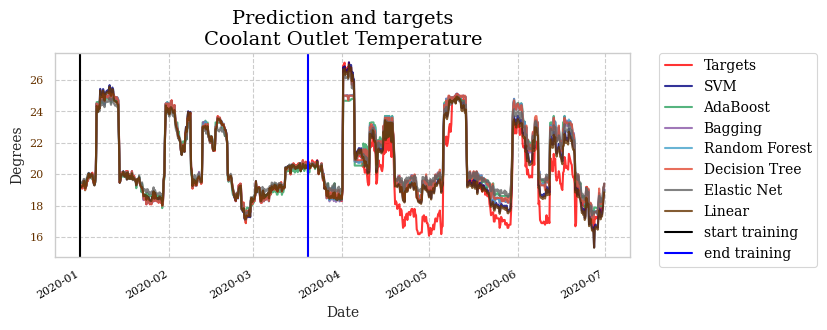

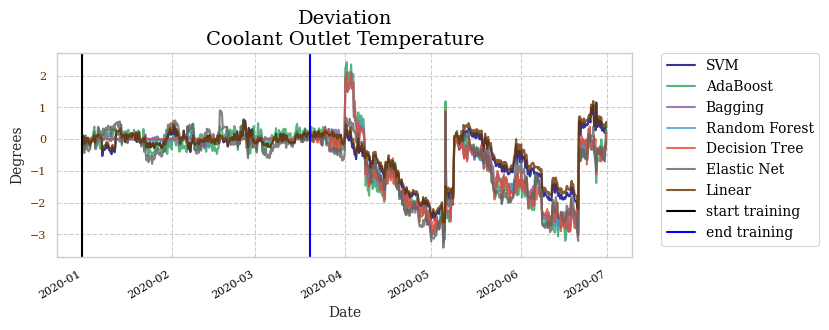

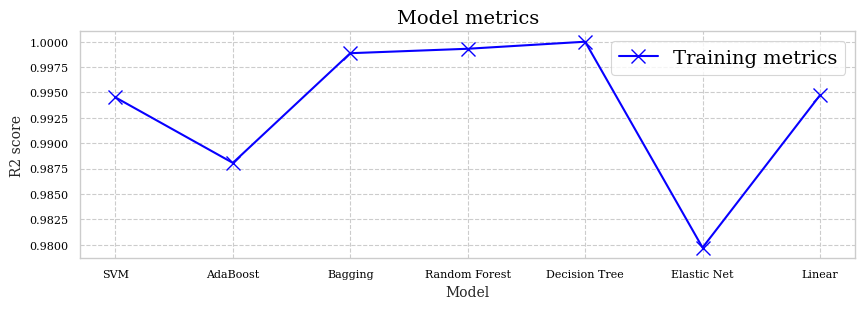

In [6]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


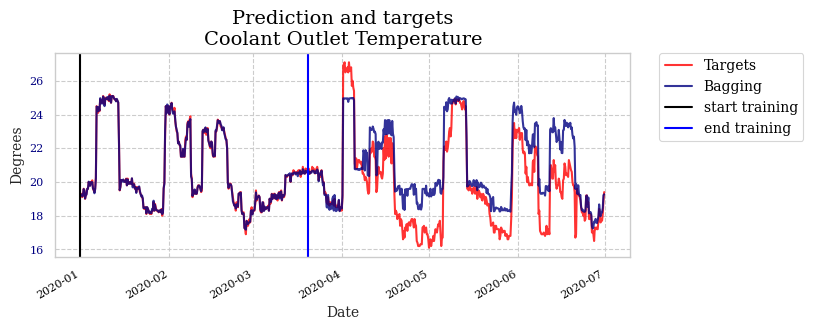

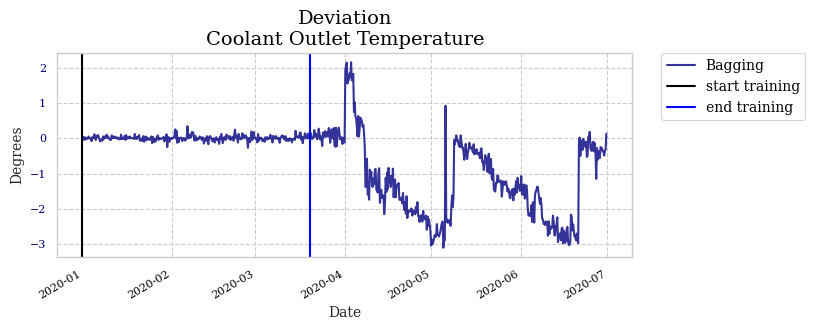

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


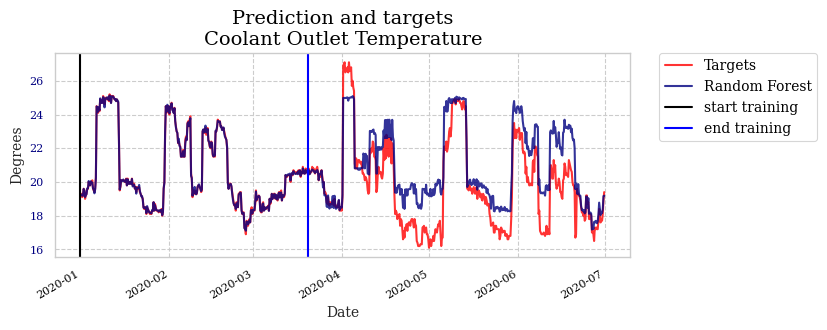

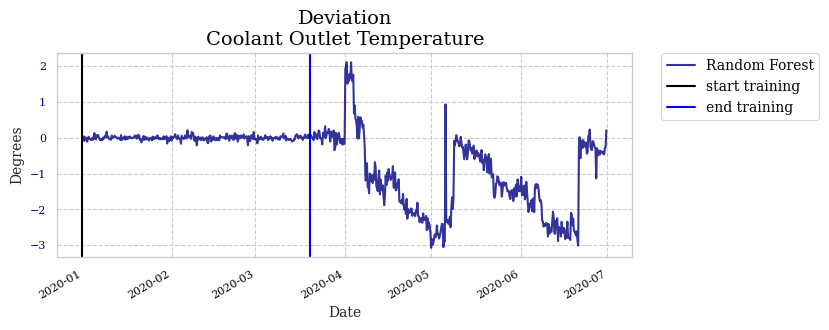

Training model Decision Tree


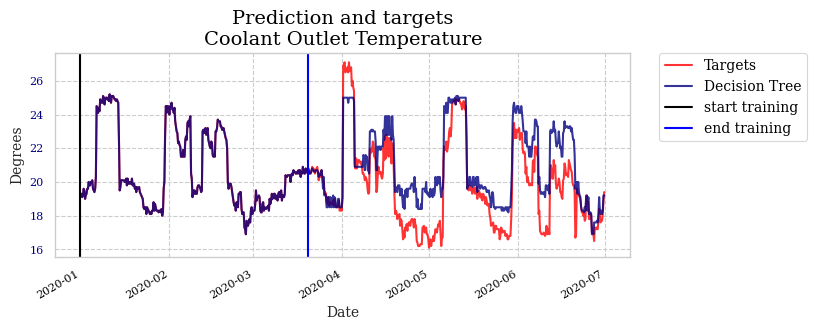

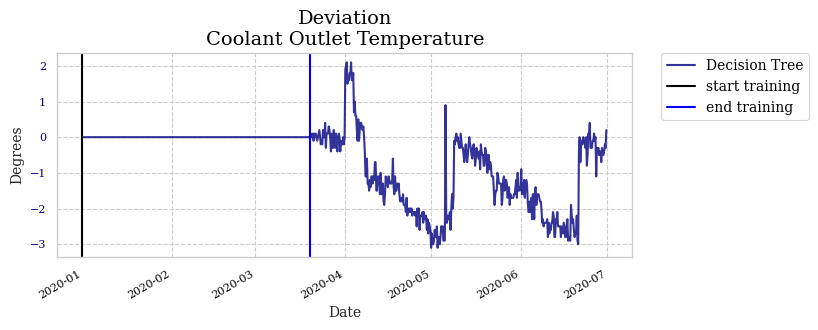

In [7]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)

# Discussions, Dataset D

The results using the above algorithms are very comparable to the linear regression model discussed previously. Interestingly, all the top scoring models appear to have a jump in deviation around 2020-04, but otherwise the deviation pattern is as expected. The Decision Tree algorithm has obviously overfitted greatly, with 100% accuracy.

mlApi.reset()

# Dataset F

In [8]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('F', 'A', '30min')

In [9]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [10]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

Training model SVM
    Trained weights for SVM:
[-0.14466084  0.42661617  0.49555962 -0.06599405]
Training model AdaBoost


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


Training model Decision Tree
Training model Elastic Net
    Trained weights for Elastic Net:
[-0.15290569  0.34439317  0.30375485 -0.0069975 ]
Training model Linear
    Trained weights for Linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.3072   |   0.0875   |
|    AdaBoost   |    0.3838   |   0.2217   |
|    Bagging    |    0.9387   |   0.1186   |
| Random Forest |    0.9554   |   0.1617   |
| Decision Tree |     1.0     |   0.1616   |
|  Elastic Net  |    0.3053   |   0.2789   |
|     Linear    |    0.3234   |   0.0673   |
+---------------+-------------+------------+


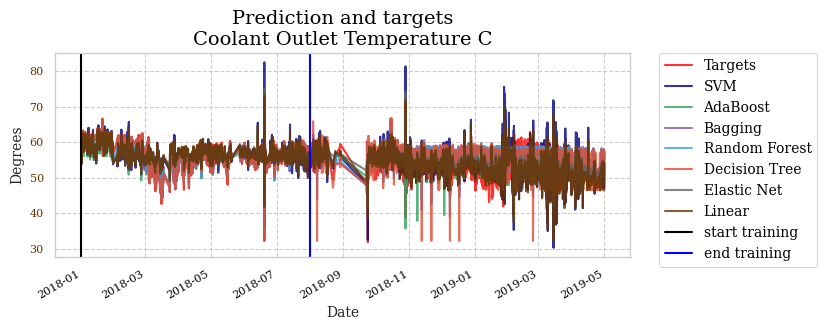

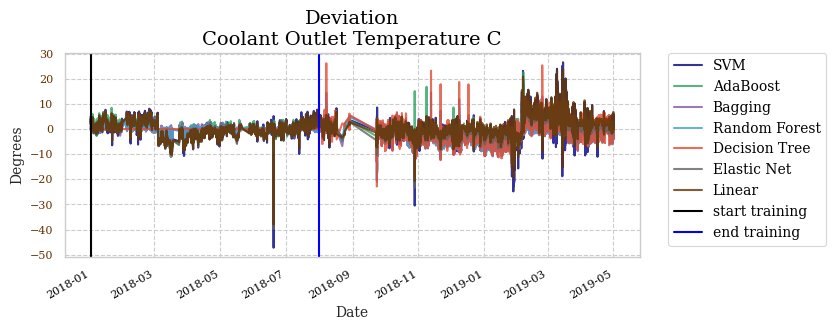

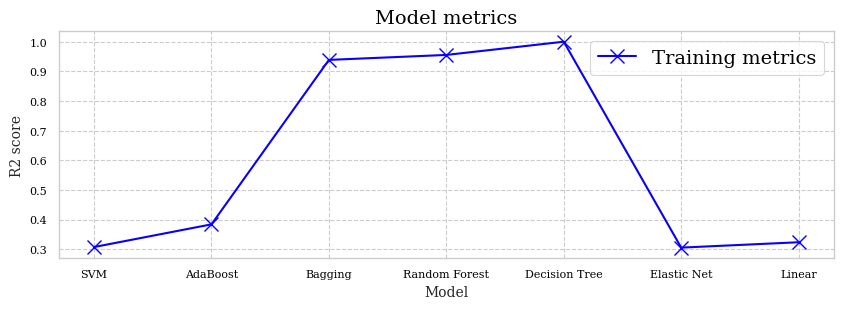

In [11]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


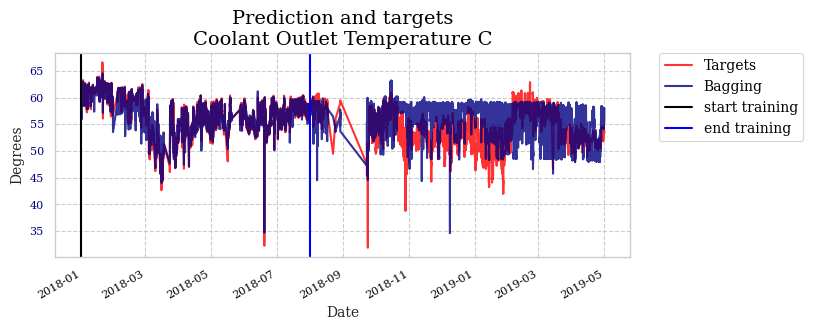

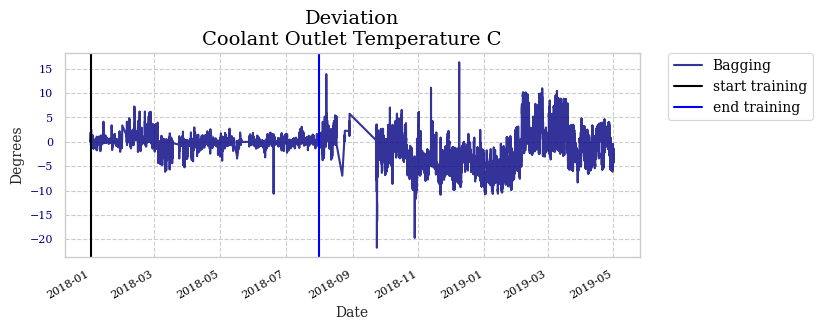

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


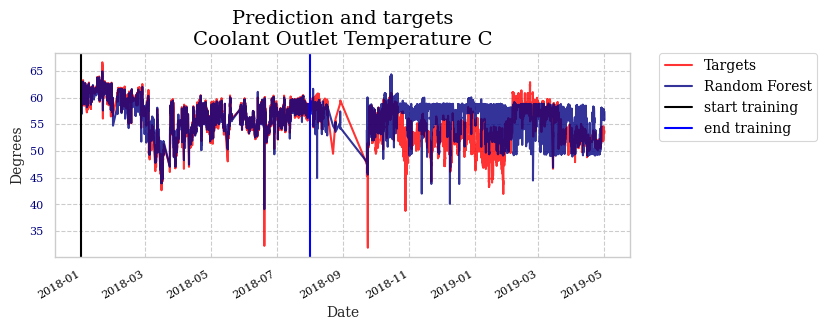

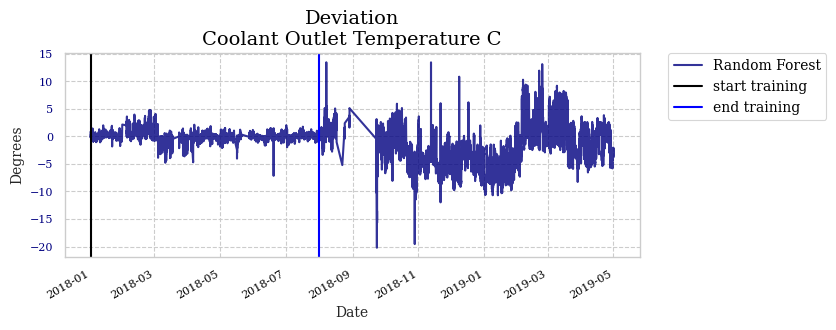

Training model Decision Tree


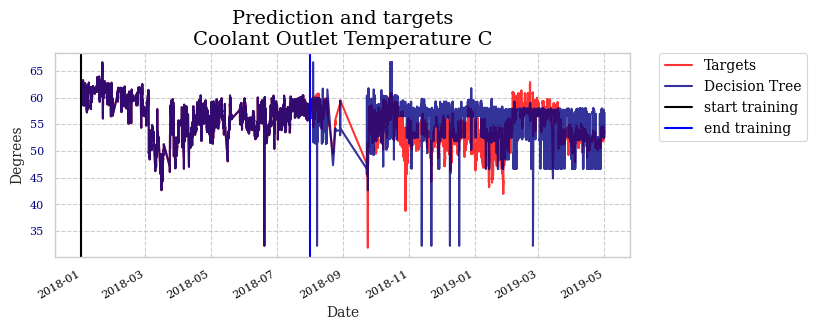

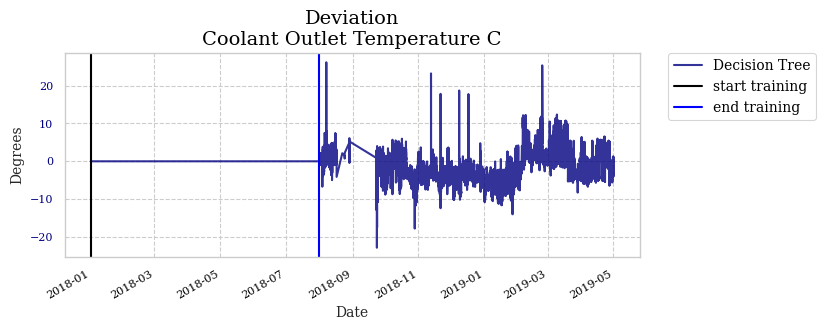

In [12]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)

# Discussions, Dataset F

Once more, the results are very to the linear regression model discussed previously. The Decision Tree model overfits once more. Predictions from the Random Forest model show very "jumpy" predictions, almost the same pattern as the tradition Decision Tree model. It appears that Tree models in general not very suitable for this type of prediction. This was expected, on the basis that there are not enough training samples to cover a large enough tree for these models to perform optimally.

In [13]:
mlApi.reset()

# Dataset G

In [14]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'A', '30min')

In [15]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows



In [16]:
svm = mlApi.SupportVectorMachine('SVM')
adaboost = mlApi.AdaBoostRegressor('AdaBoost')
bagging = mlApi.BaggingRegressor('Bagging')
randforest = mlApi.RandomForest('Random Forest')
tree = mlApi.DecisionTree('Decision Tree')
elnet = mlApi.ElasticNet('Elastic Net')
linear = mlApi.Linear_Regularized('Linear')

Training model SVM
    Trained weights for SVM:
[ 0.2517935  -0.2203883  -0.77687582 -0.35873212]
Training model AdaBoost


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training model Bagging
Training model Random Forest


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


Training model Decision Tree
Training model Elastic Net
    Trained weights for Elastic Net:
[ 0.20189639 -0.08866327 -0.62144485 -0.16890352]
Training model Linear
    Trained weights for Linear:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model prediction scores
+---------------+-------------+------------+
|     Model     | Train score | Test score |
+---------------+-------------+------------+
|      SVM      |    0.5543   |  -1.1796   |
|    AdaBoost   |    0.5664   |   -1.695   |
|    Bagging    |    0.9513   |  -1.5427   |
| Random Forest |    0.9672   |  -1.5016   |
| Decision Tree |     1.0     |  -1.6288   |
|  Elastic Net  |    0.5378   |  -1.2807   |
|     Linear    |    0.562    |  -1.2036   |
+---------------+-------------+------------+


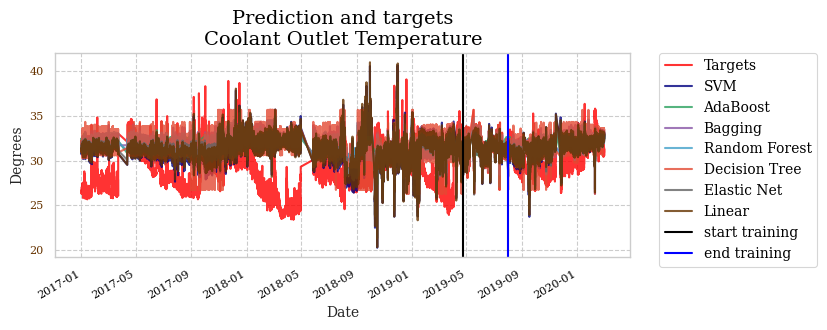

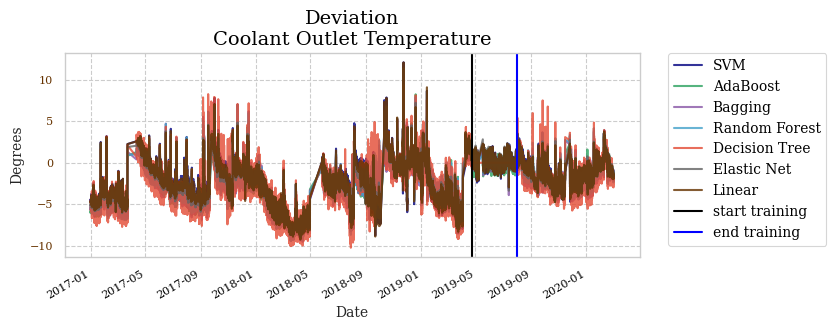

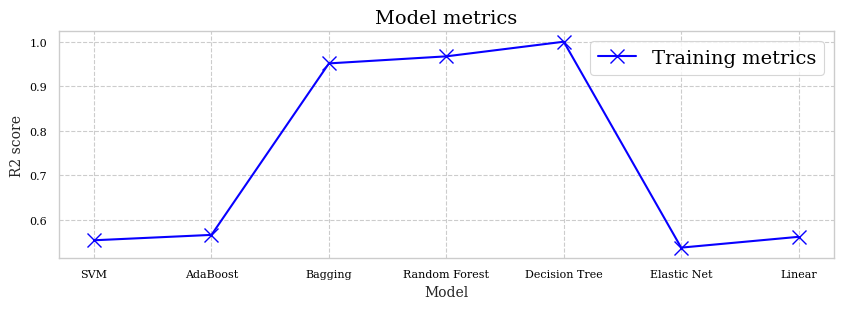

In [17]:
modelList = [
    svm,
    adaboost,
    bagging,
    randforest,
    tree,
    elnet,
    linear,
]

initTrainPredict(modelList)

Training model Bagging


c:\users\herma\apps\master-thesis\venv\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


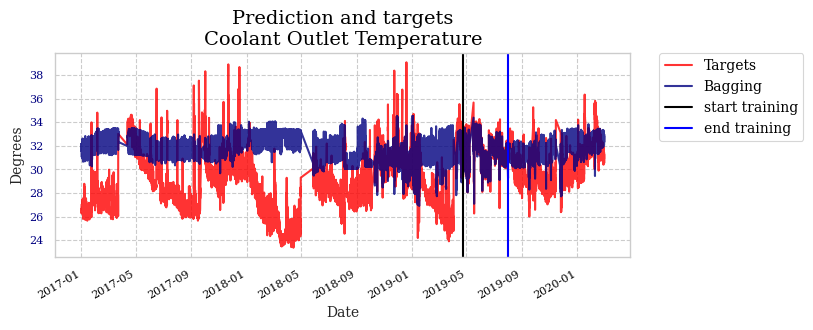

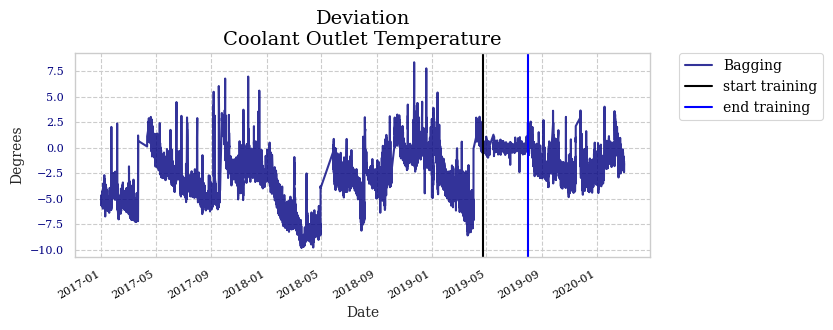

Training model Random Forest


C:\Users\herma\Apps\master-thesis\src\utils\models.py:247: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.outputScaler.transform(self.y_train),


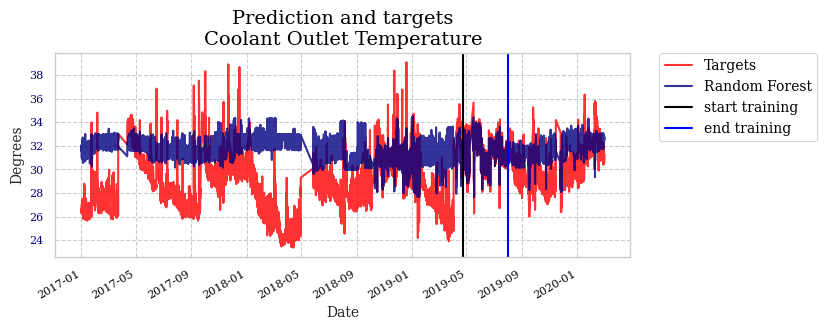

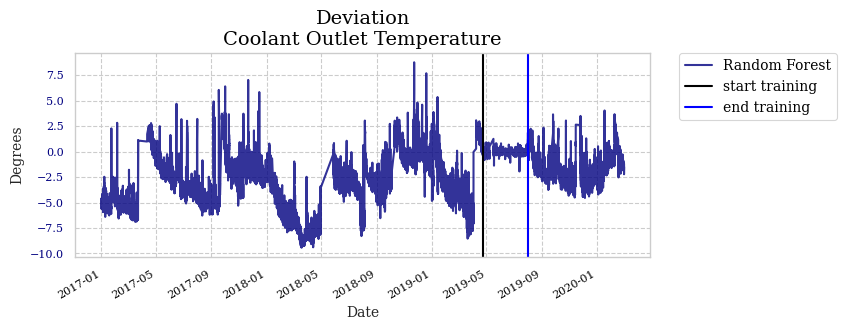

Training model Decision Tree


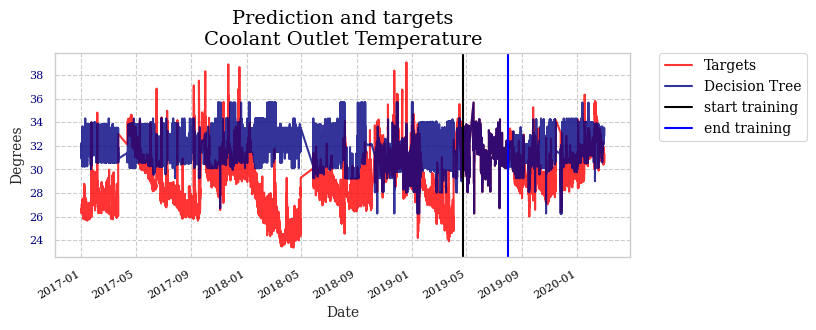

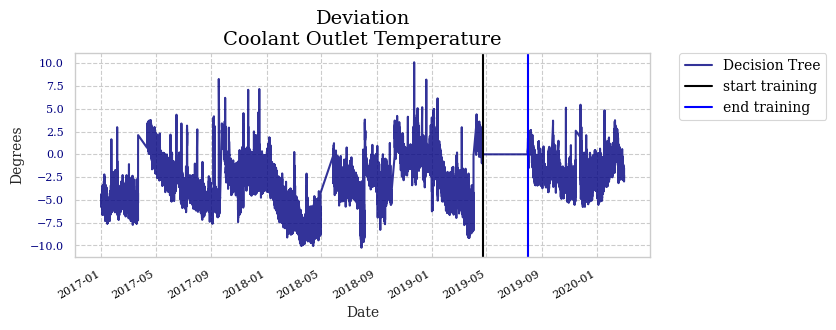

In [18]:
modelList = [
    bagging,
    randforest,
    tree,
]

for model in modelList:
    initTrainPredict([model], score=False)

# Discussions, Dataset G

The same remarks as for dataset D and F can be made.